# Clustering de clientes facturados de energia en chile de 2015 a 2021
- OBJ:
    Realizar un analisis de clustering de la base de datos del consumo de energia en Chile desde el 2015 al 2021 para asi determinar grupos de clientes dentro de la base 
    
- Metodología:
    Para realizar esto se va a seguir el siguiente paso a paso:
    - - Paso 1 cargar y limpiar data
    - - paso 2 revisar insights de la data
    - - paso 3 generar graficos
    - - paso 4 separar, entrenar y validar el modelo con un benchmark de algortimos
    - - paso 5 hacer graficos de como estos datos se comportan
    - - paso 6 conclusiones y recomendaciones

La base de datos se puede obtener desde la pagina de energia abierta
http://energiaabierta.cl/categorias-estadistica/electricidad/?sf_paged=2

     

Iniciando se van a cargar las librerias de base que se van a usar para la visualización de los datos
que serán:
- matplotlib
- Numpy
- Pandas
- Seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Ya cargados se va a cargar la base, esto es de la siguiente manera

In [2]:
base_zero=pd.read_csv('/Users/matiasinostrozacifuentes/Desktop/Desktop/Energía SEN/se_facturacion_clientes_regulados.csv',sep=';')
base_zero.columns

Index(['anio', 'mes', 'region', 'comuna', 'tipo_clientes', 'tarifa',
       ' clientes_facturados ', ' e1_kwh ', ' e2_kwh ', 'energia_kwh'],
      dtype='object')

Donde las columnas son las siguientes:
Anio= Referencia al año en que es el dato
mes= Correspondiente al mes del dato
Region = Region geografica de Chile de donde proviene el dato
comuna= Comuna geografica de Chile de la región donde proviene el dato
tipo_cliente = Hace referencia a si los clientes son domiciliarios o industriales
tarifa= Tipo de tarifa aplicada 
Clientes_facturados= Cantidad de clientes facturados de ese dato
e1_kwh
e2_kwh
energia_kwh= suma de e1 y e2

Ahora revisando la primera impresion de la data

In [3]:
base_zero.head()

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
0,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PP,179,108809,-,108809
1,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT43,128,3241469,-,3241469
2,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT42,14,257092,-,257092
3,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PPP,10,6555,-,6555
4,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT42,1,588,-,588


In [4]:
base_zero.tail()

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
338647,2021,12,Región de Magallanes y de la Antártica Chilena,Porvenir,No Residencial,BT3PP,22,61353,-,61353
338648,2021,12,Región de La Araucanía,Pitrufquén,No Residencial,BT3PP,12,44729,-,44729
338649,2021,12,Región de Arica y Parinacota,Arica,No Residencial,BT3PP,399,1016534,-,1016534
338650,2021,12,Región de Arica y Parinacota,Putre,No Residencial,BT3PP,2,9488,-,9488
338651,2021,12,Región Metropolitana de Santiago,Buin,No Residencial,BT3PP,109,374938,-,374938


Revisando las primeras impresiones de la data

In [5]:
base_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338652 entries, 0 to 338651
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   anio                   338652 non-null  int64 
 1   mes                    338652 non-null  int64 
 2   region                 338652 non-null  object
 3   comuna                 338652 non-null  object
 4   tipo_clientes          338652 non-null  object
 5   tarifa                 338652 non-null  object
 6    clientes_facturados   338651 non-null  object
 7    e1_kwh                338640 non-null  object
 8    e2_kwh                338640 non-null  object
 9   energia_kwh            338652 non-null  object
dtypes: int64(2), object(8)
memory usage: 25.8+ MB


Se puede observar que hay datos que son nulos, pero además que los campos de [Clientes facturados], [e1_kwh], [e2_kwh] y [energia_kwh] que deberían ser numericos pero son catalogados como object, por lo que hay que tratarlos para que sean numericos

In [6]:
base_zero['energia_kwh']=pd.to_numeric(base_zero['energia_kwh'],errors='coerce')
base_zero[' clientes_facturados ']=pd.to_numeric(base_zero[' clientes_facturados '],errors='coerce')
base_zero[' e1_kwh ']=pd.to_numeric(base_zero[' e1_kwh '],errors='coerce')
base_zero[' e2_kwh ']=pd.to_numeric(base_zero[' e2_kwh '],errors='coerce')


Revisando que haya quedado bien la transformación

In [7]:
base_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338652 entries, 0 to 338651
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   anio                   338652 non-null  int64  
 1   mes                    338652 non-null  int64  
 2   region                 338652 non-null  object 
 3   comuna                 338652 non-null  object 
 4   tipo_clientes          338652 non-null  object 
 5   tarifa                 338652 non-null  object 
 6    clientes_facturados   334171 non-null  float64
 7    e1_kwh                328805 non-null  float64
 8    e2_kwh                20275 non-null   float64
 9   energia_kwh            328805 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 25.8+ MB


Ahora reemplazando los NaN con 0 

In [8]:
base_zero.fillna(0,inplace=True)

In [9]:
base_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338652 entries, 0 to 338651
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   anio                   338652 non-null  int64  
 1   mes                    338652 non-null  int64  
 2   region                 338652 non-null  object 
 3   comuna                 338652 non-null  object 
 4   tipo_clientes          338652 non-null  object 
 5   tarifa                 338652 non-null  object 
 6    clientes_facturados   338652 non-null  float64
 7    e1_kwh                338652 non-null  float64
 8    e2_kwh                338652 non-null  float64
 9   energia_kwh            338652 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 25.8+ MB


Eliminando los duplicados en caso de

In [10]:
base_zero.drop_duplicates(inplace=True)

Dado que quedaron bien, se prosigue

Se define la siguiente función para así mostrar los posibles categorias que pueden obtener las variables categoricas

In [11]:
def separando_categorias(df):
    tiposdatos=pd.DataFrame(df.dtypes) 
    tiposdatos.reset_index(inplace=True)
    tiposdatos

    for i in range(df.shape[1]):
            if df.dtypes[i] == 'object':
                print(df[tiposdatos['index'][i]].value_counts())
                print('valores unicos de la categoria ',df.columns[i] ,'son: ',df[tiposdatos['index'][i]].nunique())
    return df

Viendo los elementos unicos por columna categorica

In [12]:
separando_categorias(base_zero)

Región Metropolitana de Santiago                  52408
Región de Valparaíso                              40974
Región de La Araucanía                            35756
Región del Libertador Gral Bernardo O’Higgins     33321
Región del Biobío                                 33088
Región del Maule                                  31539
Región de Los Lagos                               30490
Región de Ñuble                                   20648
Región de Coquimbo                                15118
Región de Los Ríos                                13661
Región de Atacama                                  9237
Región Aisén del GralCarlos Ibáñez del Campo       6258
Región de Antofagasta                              5489
Región de Tarapacá                                 4816
Región de Magallanes y de la Antártica Chilena     4046
Región de Arica y Parinacota                       1802
Name: region, dtype: int64
valores unicos de la categoria  region son:  16
Temuco              1398
Vict

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
0,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PP,179.0,108809.0,0.0,108809.0
1,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT43,128.0,3241469.0,0.0,3241469.0
2,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT42,14.0,257092.0,0.0,257092.0
3,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PPP,10.0,6555.0,0.0,6555.0
4,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT42,1.0,588.0,0.0,588.0
...,...,...,...,...,...,...,...,...,...,...
338647,2021,12,Región de Magallanes y de la Antártica Chilena,Porvenir,No Residencial,BT3PP,22.0,61353.0,0.0,61353.0
338648,2021,12,Región de La Araucanía,Pitrufquén,No Residencial,BT3PP,12.0,44729.0,0.0,44729.0
338649,2021,12,Región de Arica y Parinacota,Arica,No Residencial,BT3PP,399.0,1016534.0,0.0,1016534.0
338650,2021,12,Región de Arica y Parinacota,Putre,No Residencial,BT3PP,2.0,9488.0,0.0,9488.0


Podemos ver que en resumen existen:
16 regiones
330 comunas
2 tipos de clientes
40 tipos de tarifas distintas

Ya definido esto, podemos hacer algunos gráficos primarios que indiquen como se comportan estos datos 
Tanto para las variables categoricas como para las numericas, por lo que se definirá una función

viendo el comportamiento de la energia

In [13]:
base_zero.energia_kwh.describe()

count    3.386510e+05
mean     5.847105e+05
std      2.408227e+06
min     -1.454852e+06
25%      6.937000e+03
50%      3.111200e+04
75%      1.842135e+05
max      1.092828e+08
Name: energia_kwh, dtype: float64

Como el valor máximo es más de 100 millones se va a estandarizar estos valores 

In [14]:
base_zero['energia_kwh']

0          108809.0
1         3241469.0
2          257092.0
3            6555.0
4             588.0
            ...    
338647      61353.0
338648      44729.0
338649    1016534.0
338650       9488.0
338651     374938.0
Name: energia_kwh, Length: 338651, dtype: float64

Media de los datos [584710.50826367]
Varianza de los datos [5.79954026e+12]


Text(0.5, 1.0, 'Precios escalados')

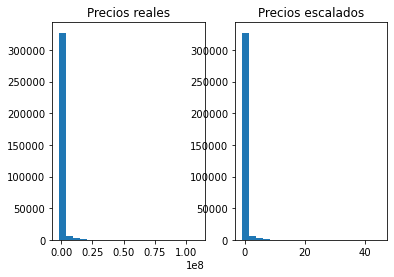

In [15]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # Creación de objeto StandardScaler
scaler.fit(base_zero[['energia_kwh']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scaler.mean_)
print('Varianza de los datos', scaler.var_)
price_scaled = scaler.transform(base_zero[['energia_kwh']]) # Transformación de los datos


fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.hist(base_zero[['energia_kwh']],bins=20)
ax1.set_title('Precios reales')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(price_scaled, bins=20)
ax2.set_title('Precios escalados')


In [16]:
tiposdatos2=pd.DataFrame(base_zero.dtypes) #Codigo mostrado en clases por un compañero
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,anio,int64
1,mes,int64
2,region,object
3,comuna,object
4,tipo_clientes,object
5,tarifa,object
6,clientes_facturados,float64
7,e1_kwh,float64
8,e2_kwh,float64
9,energia_kwh,float64


In [17]:
base_zero.shape[1]

10

In [18]:
base_zero.dtypes

anio                       int64
mes                        int64
region                    object
comuna                    object
tipo_clientes             object
tarifa                    object
 clientes_facturados     float64
 e1_kwh                  float64
 e2_kwh                  float64
energia_kwh              float64
dtype: object

In [19]:
def graf_automaticos(df):
    tiposdatos2=pd.DataFrame(df.dtypes) #Codigo mostrado en clases por un compañero
    tiposdatos2.reset_index(inplace=True)
    tiposdatos2

    for i in range(df.shape[1]):
            if df.dtypes[i] != 'object':
                    plt.figure(dpi=300)
                    sns.histplot(df[tiposdatos2['index'][i]],bins=25)
                    plt.xticks(rotation=45)
                    plt.title(tiposdatos2['index'][i])
                    plt.show()
            else:
                    obj=df[tiposdatos2['index'][i]].value_counts()
                    obj=obj.head(40)
                    plt.figure(dpi=300)
                    plt.tick_params(axis='y',which='major',labelsize=5)
                    sns.barplot(y=obj.index,x=obj.values,palette='husl')
                    plt.title(tiposdatos2['index'][i])
                    plt.tight_layout()
                    plt.show()
    return df

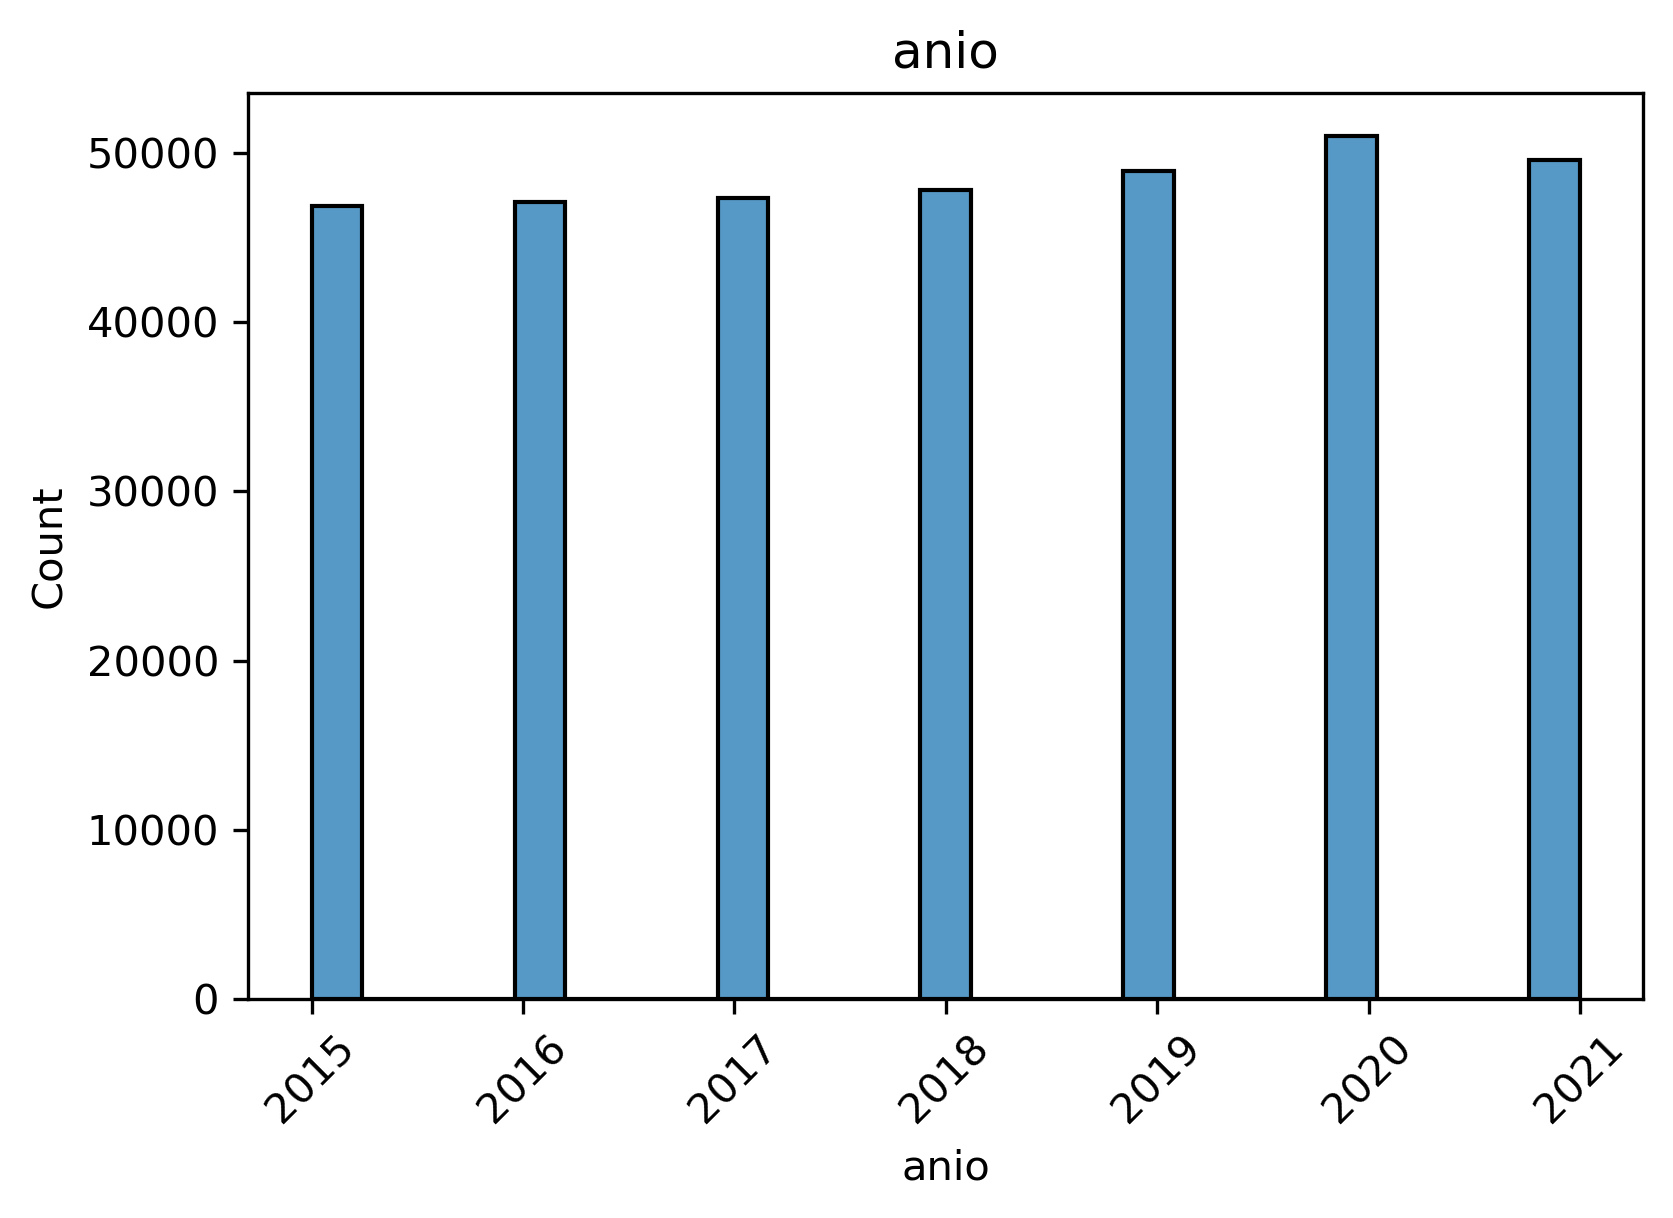

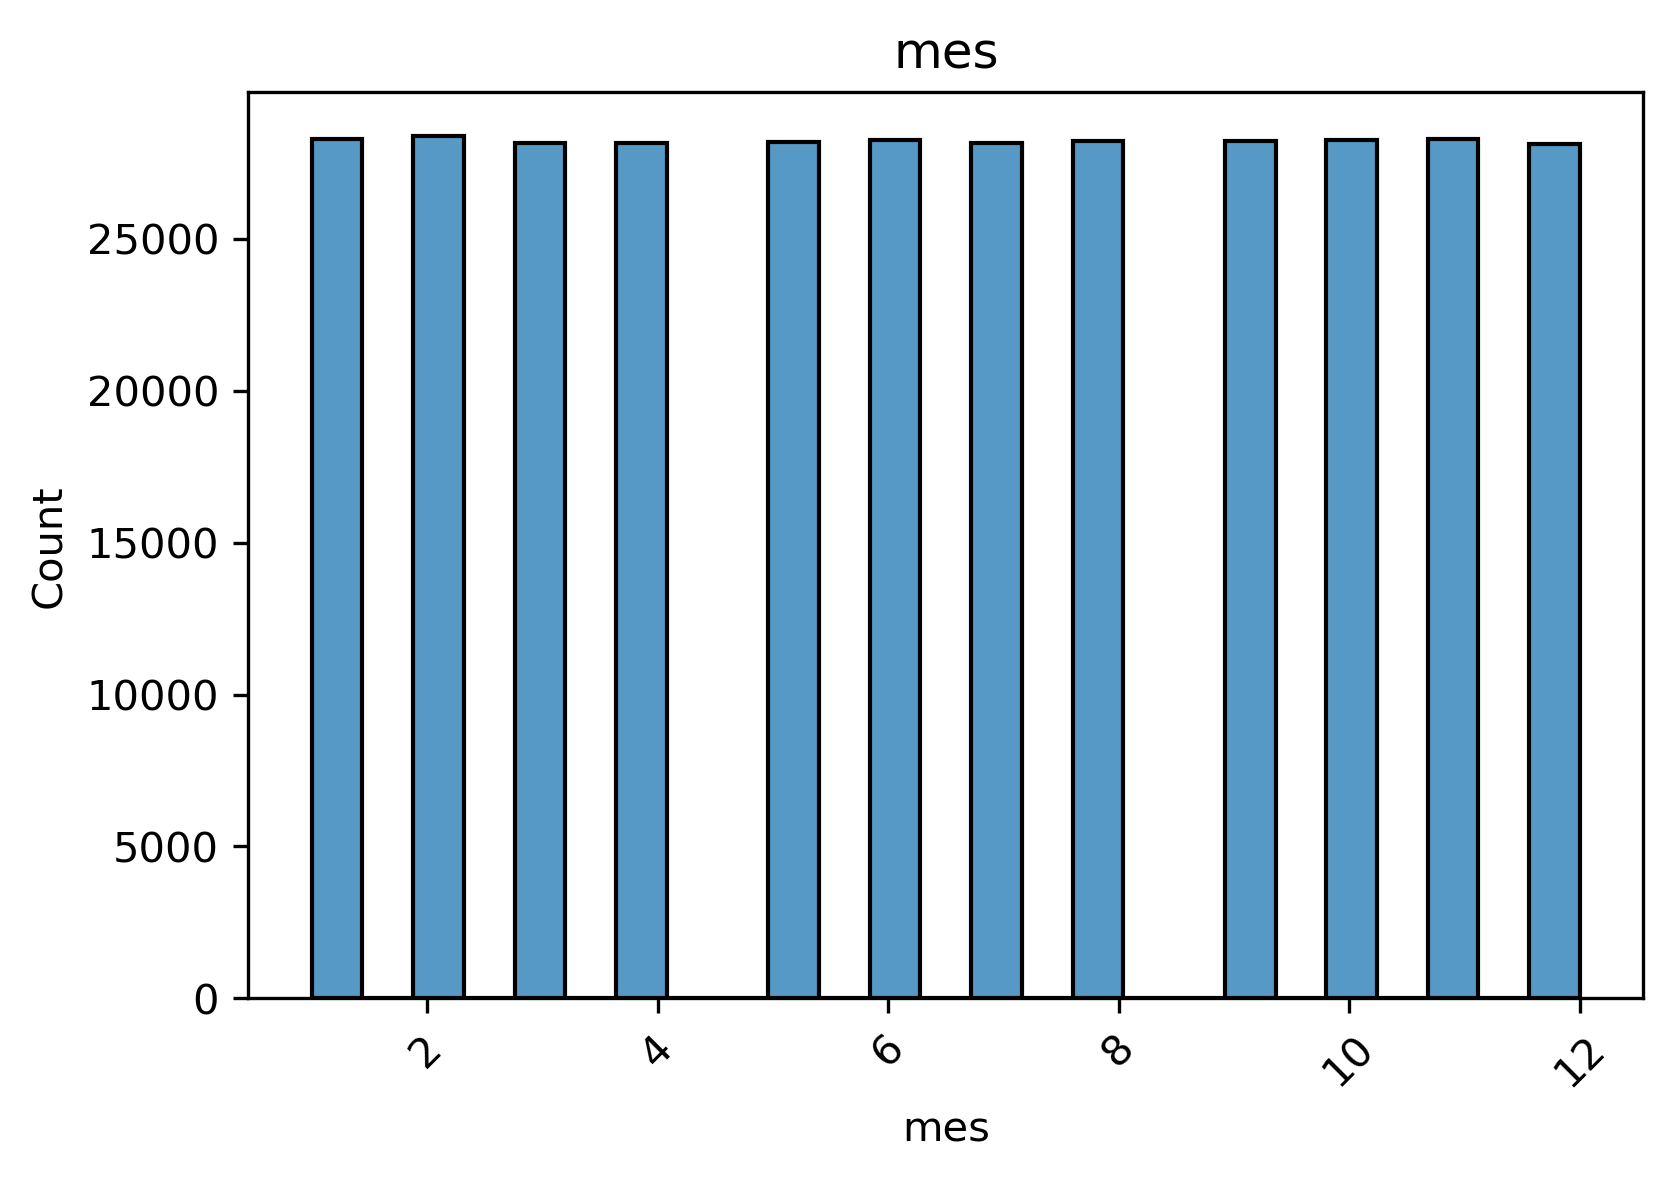

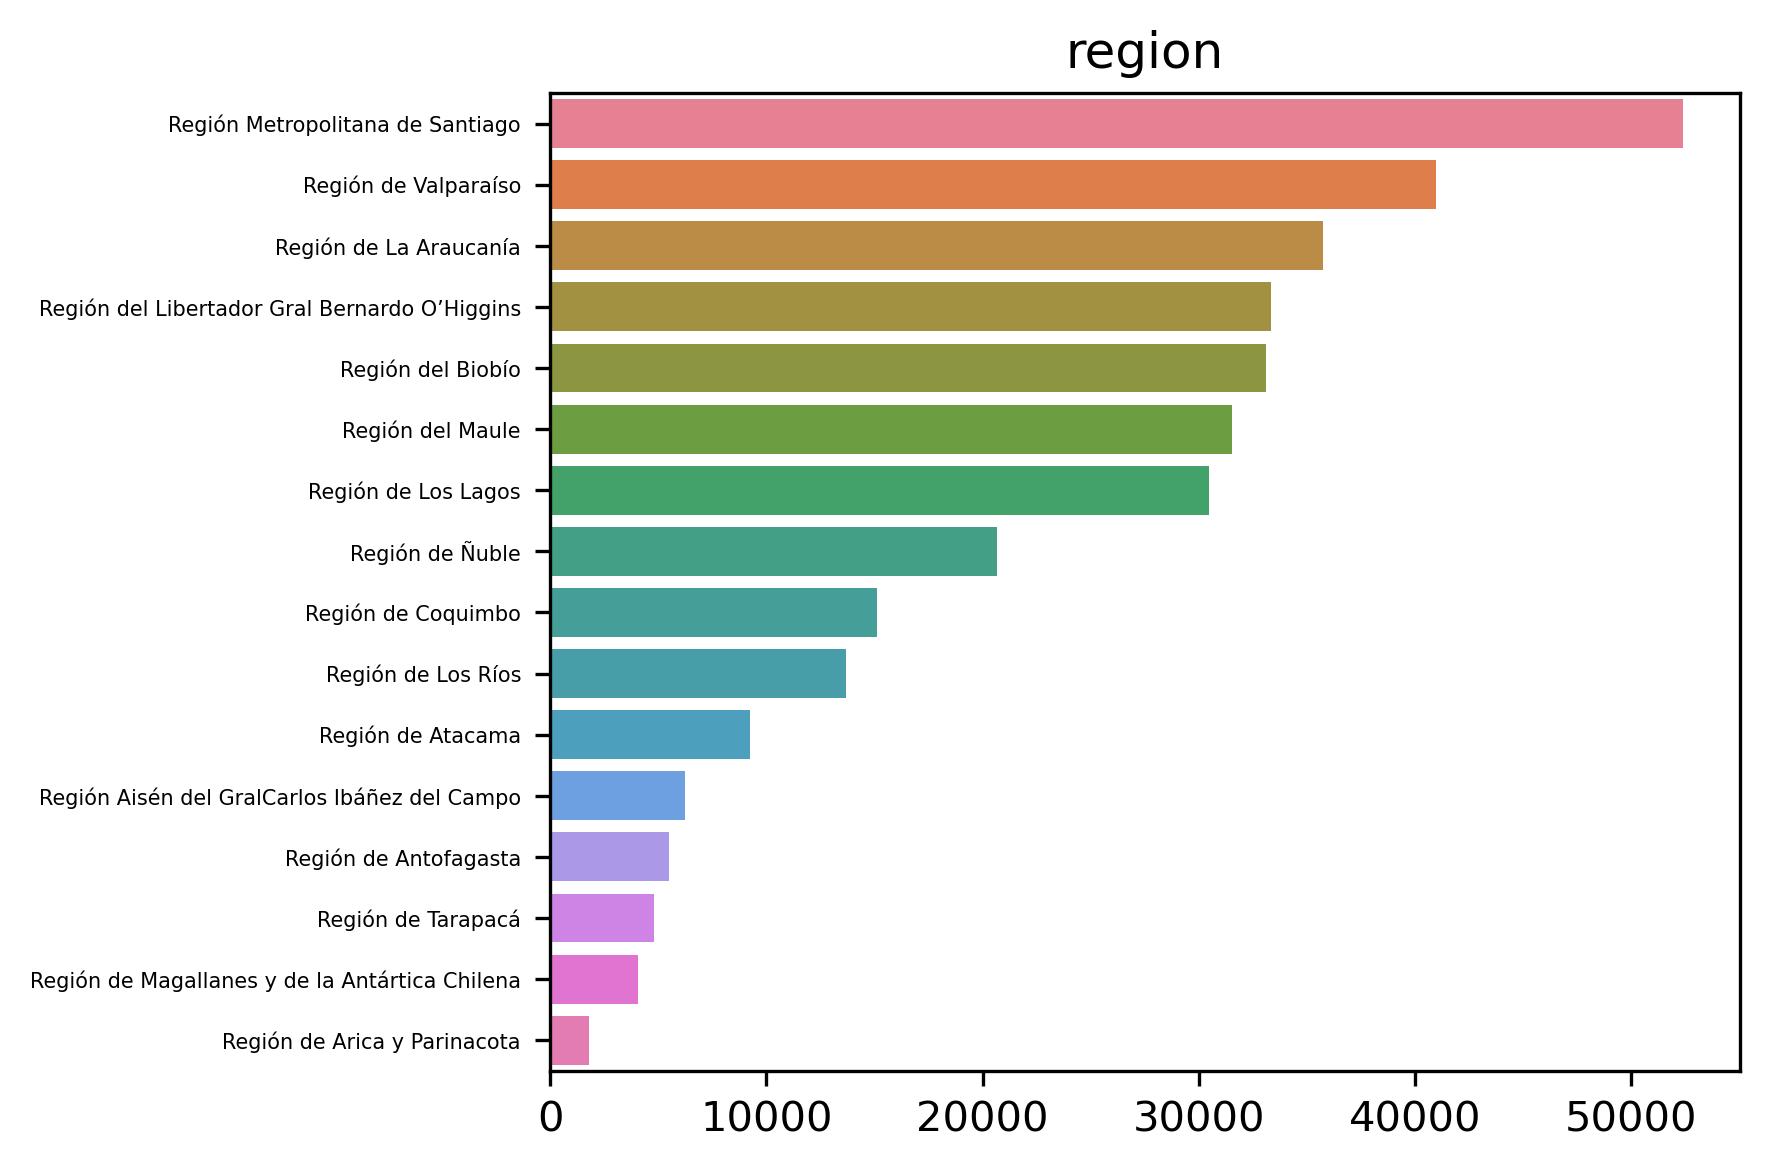

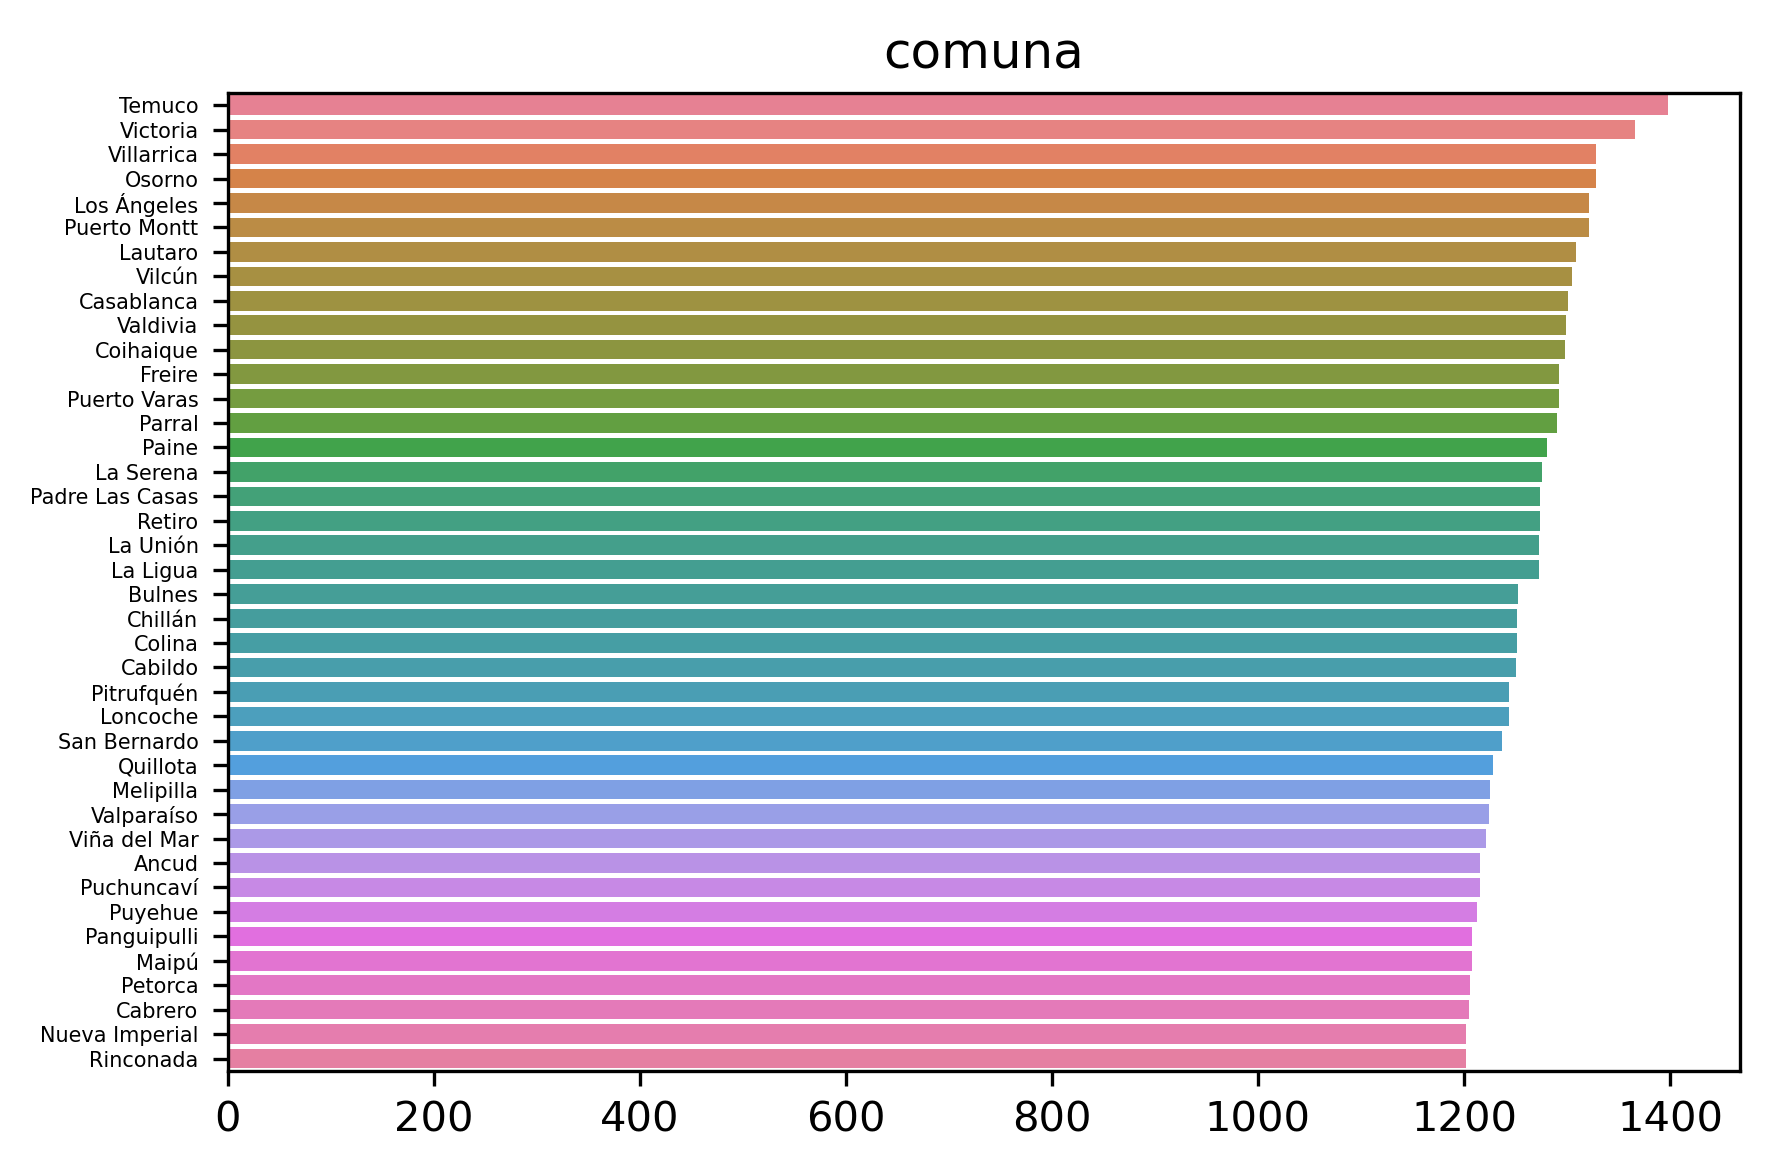

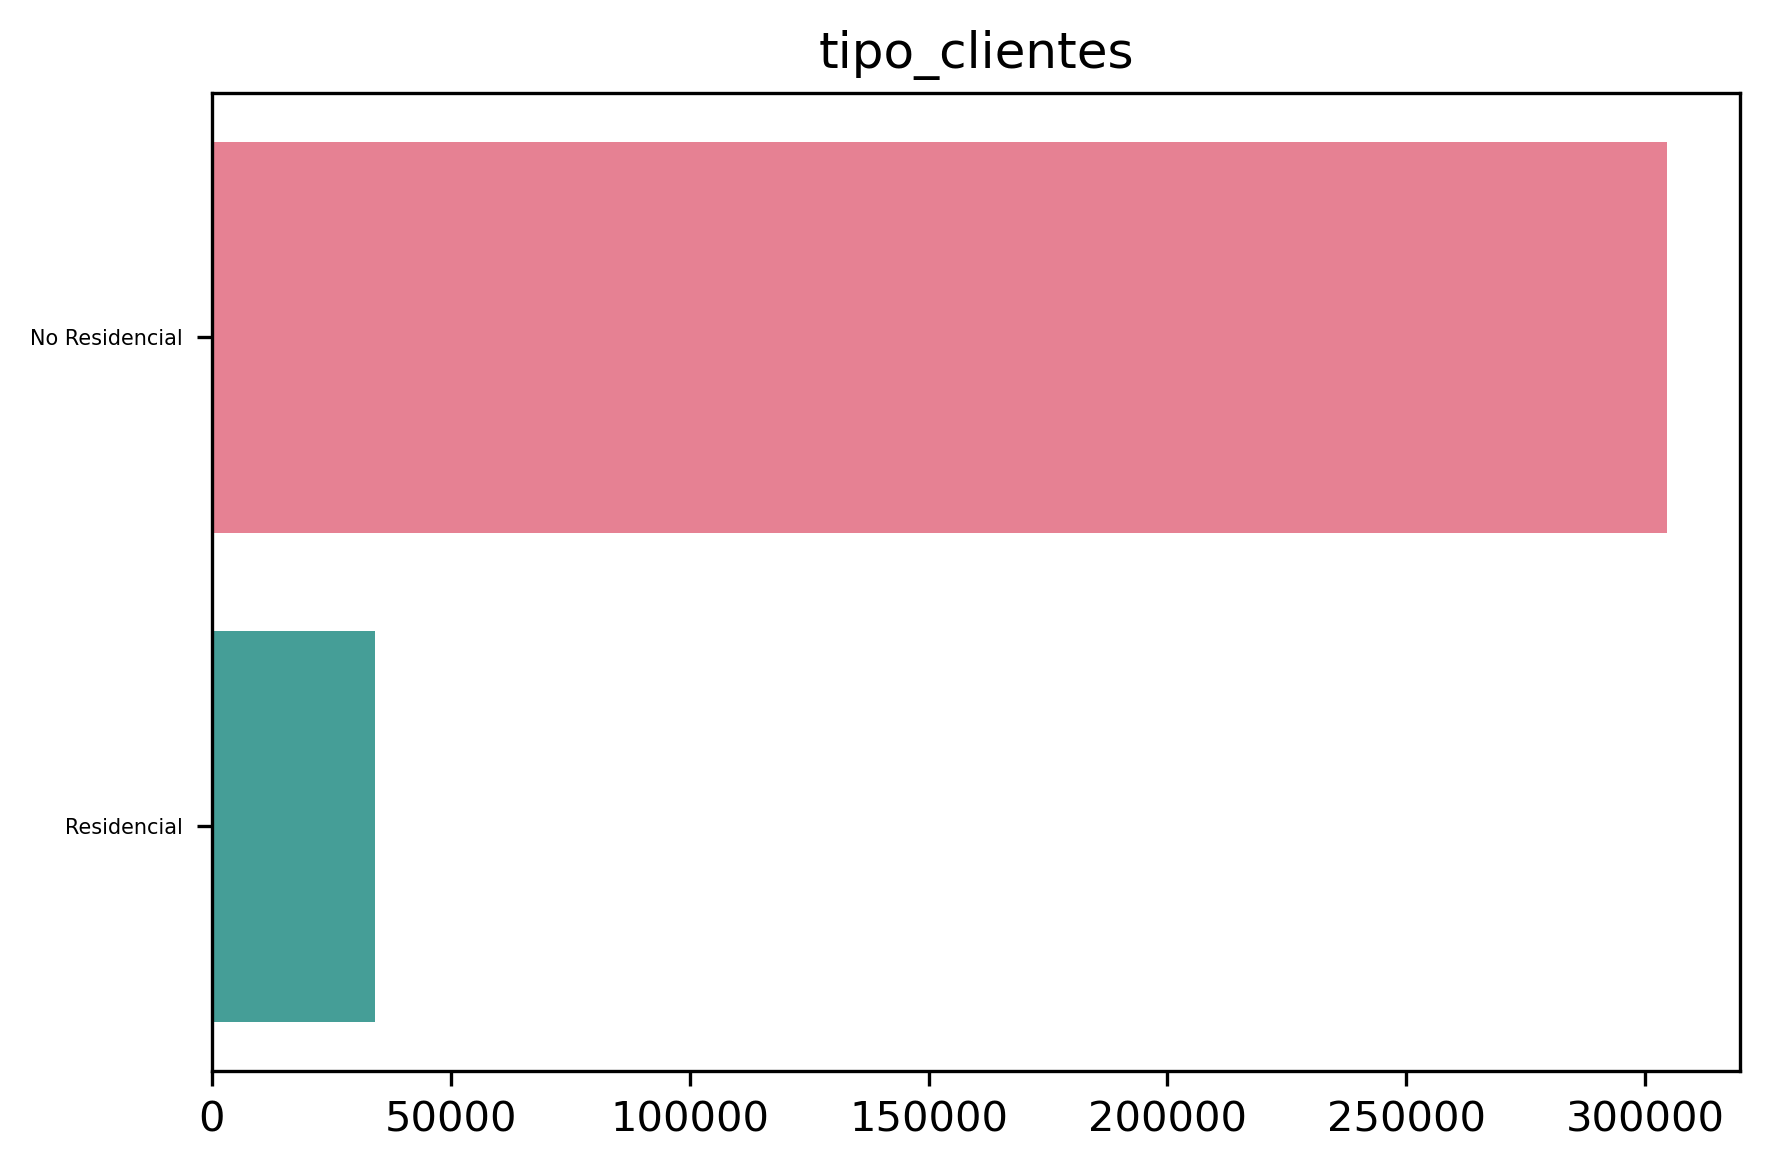

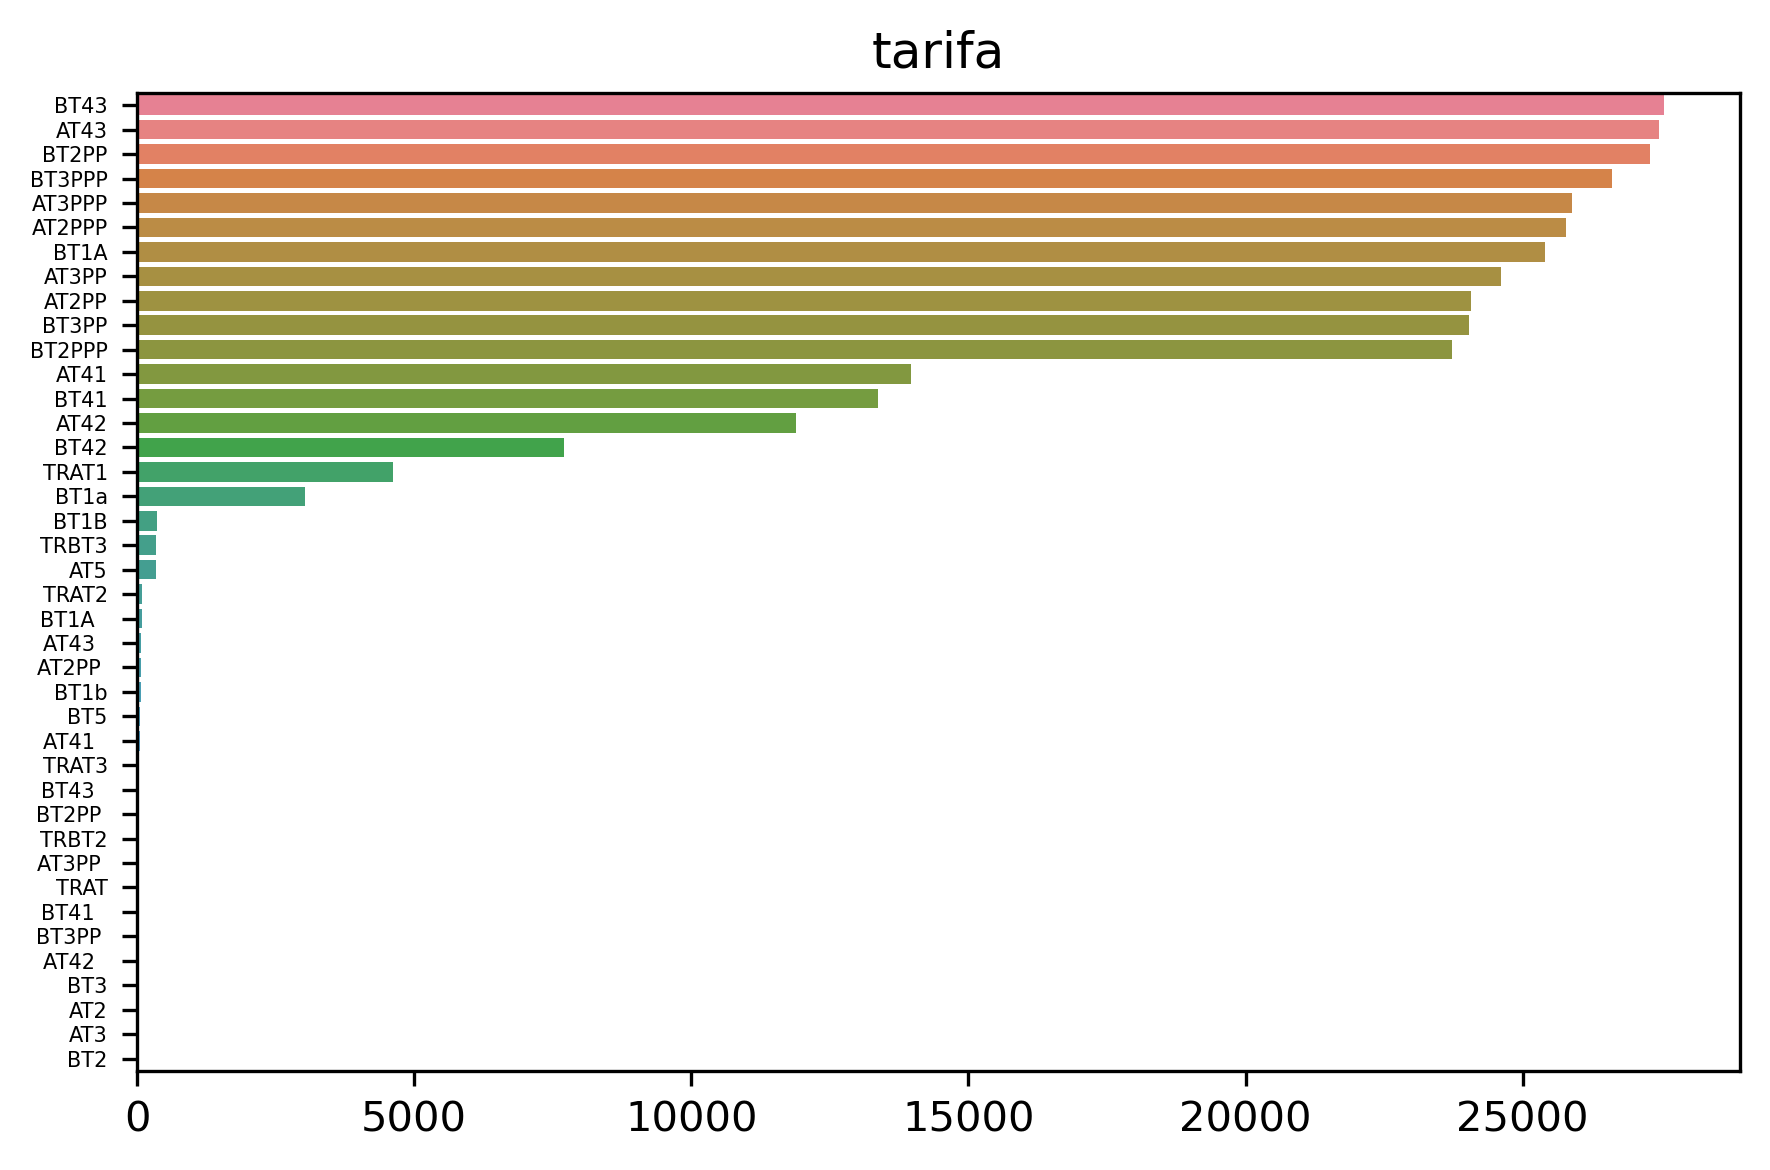

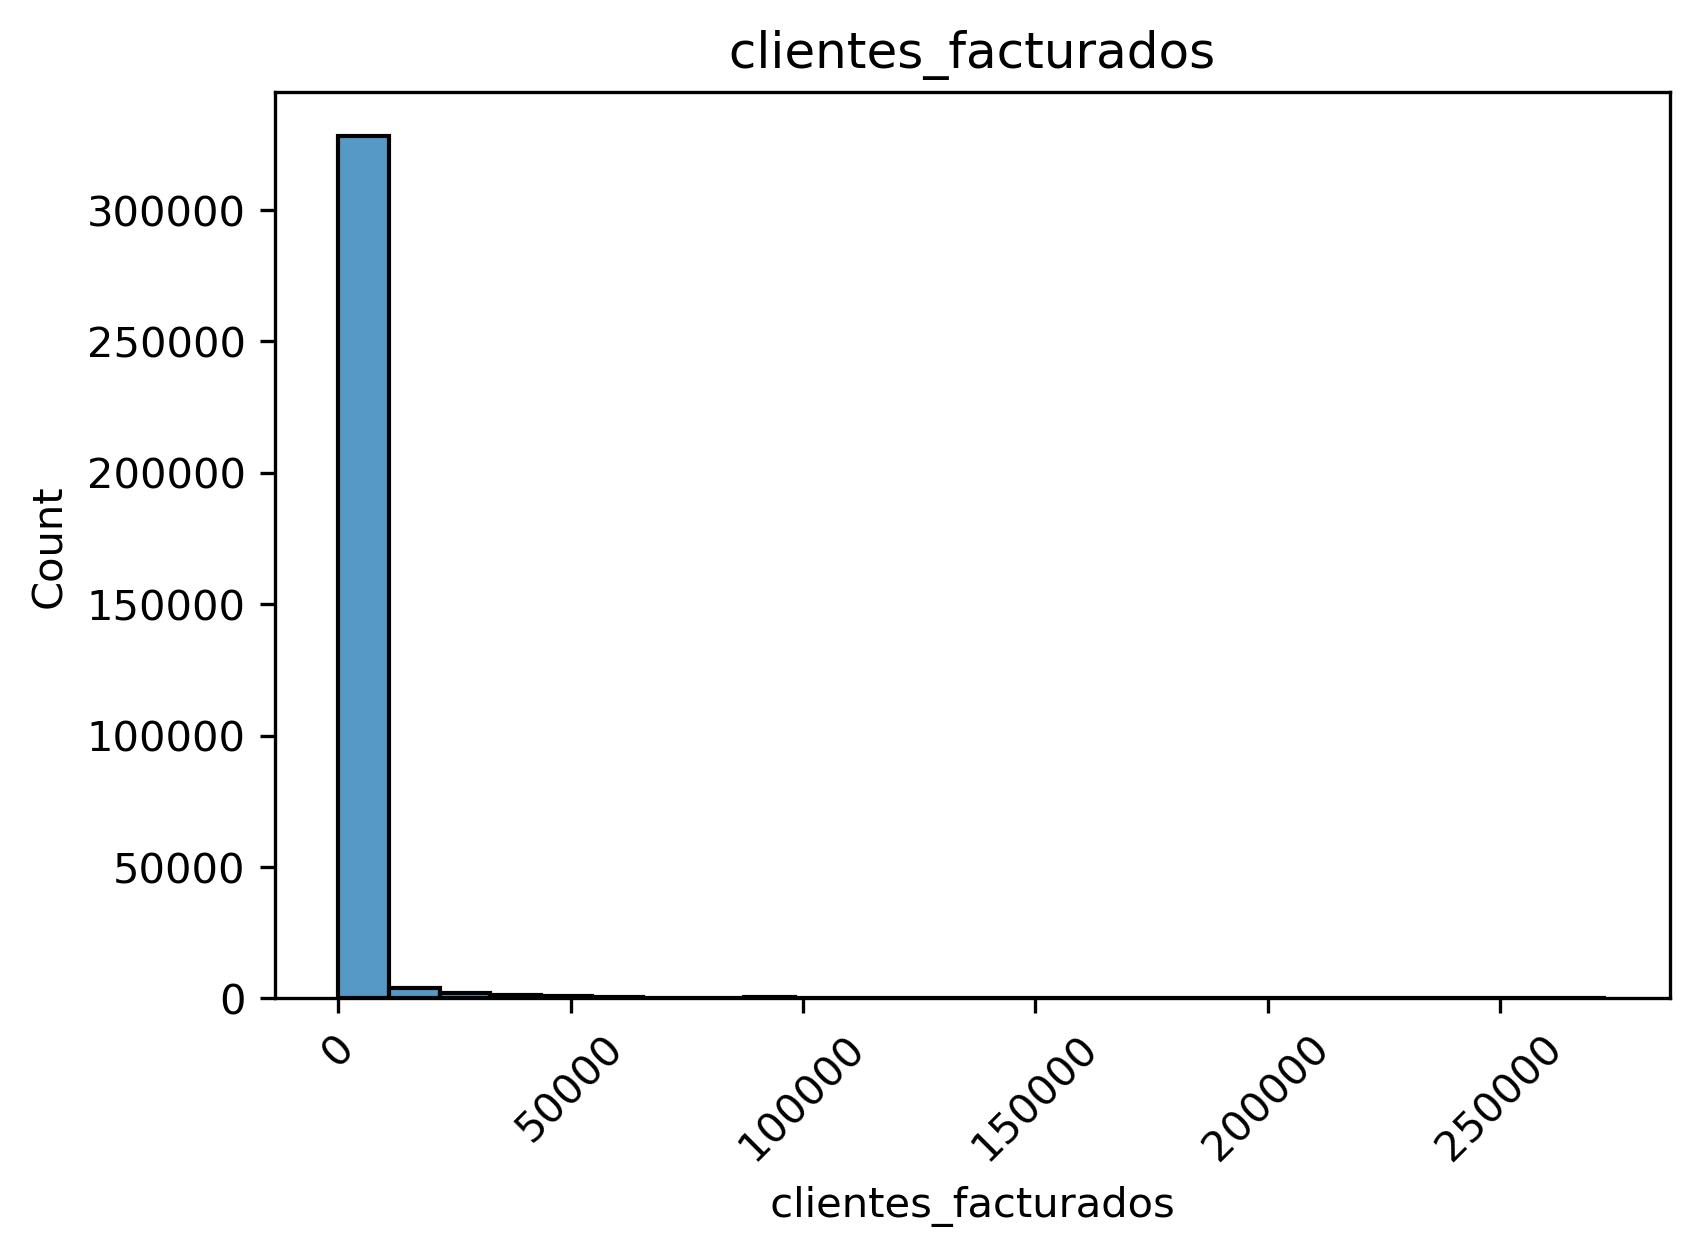

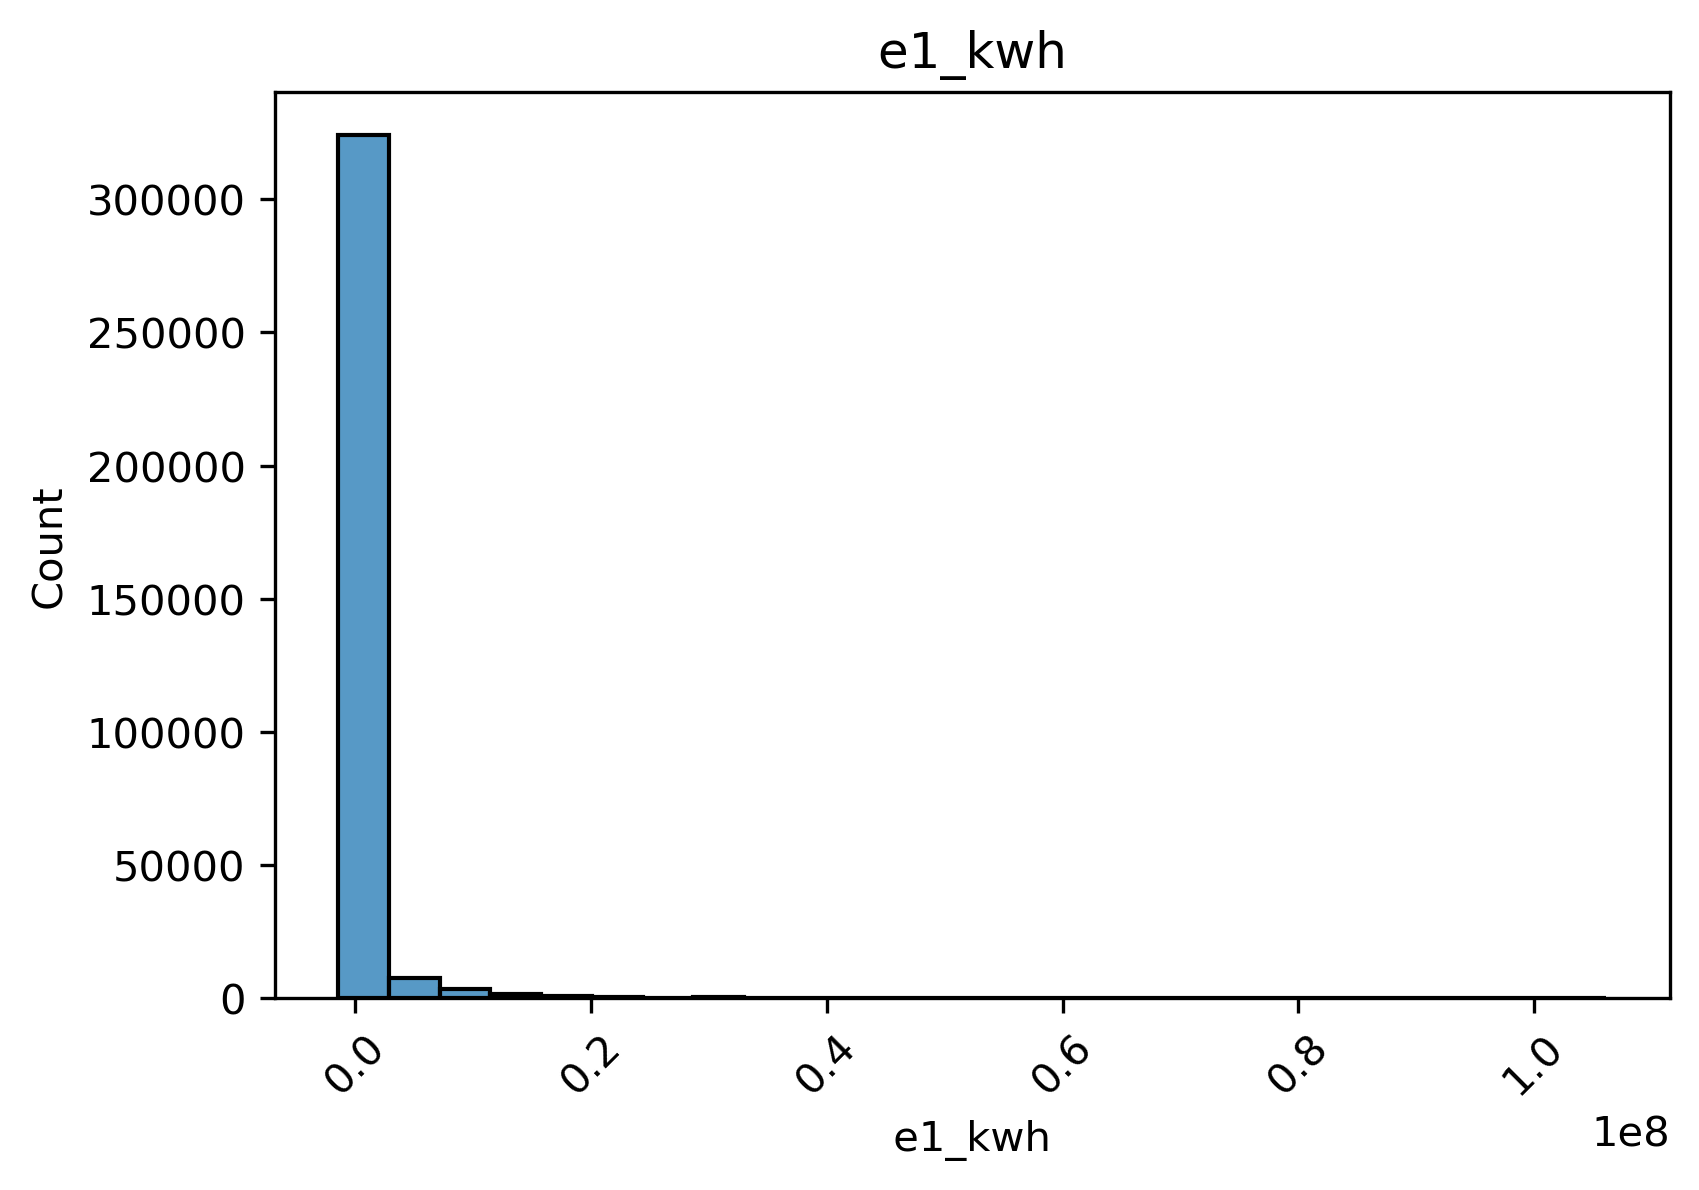

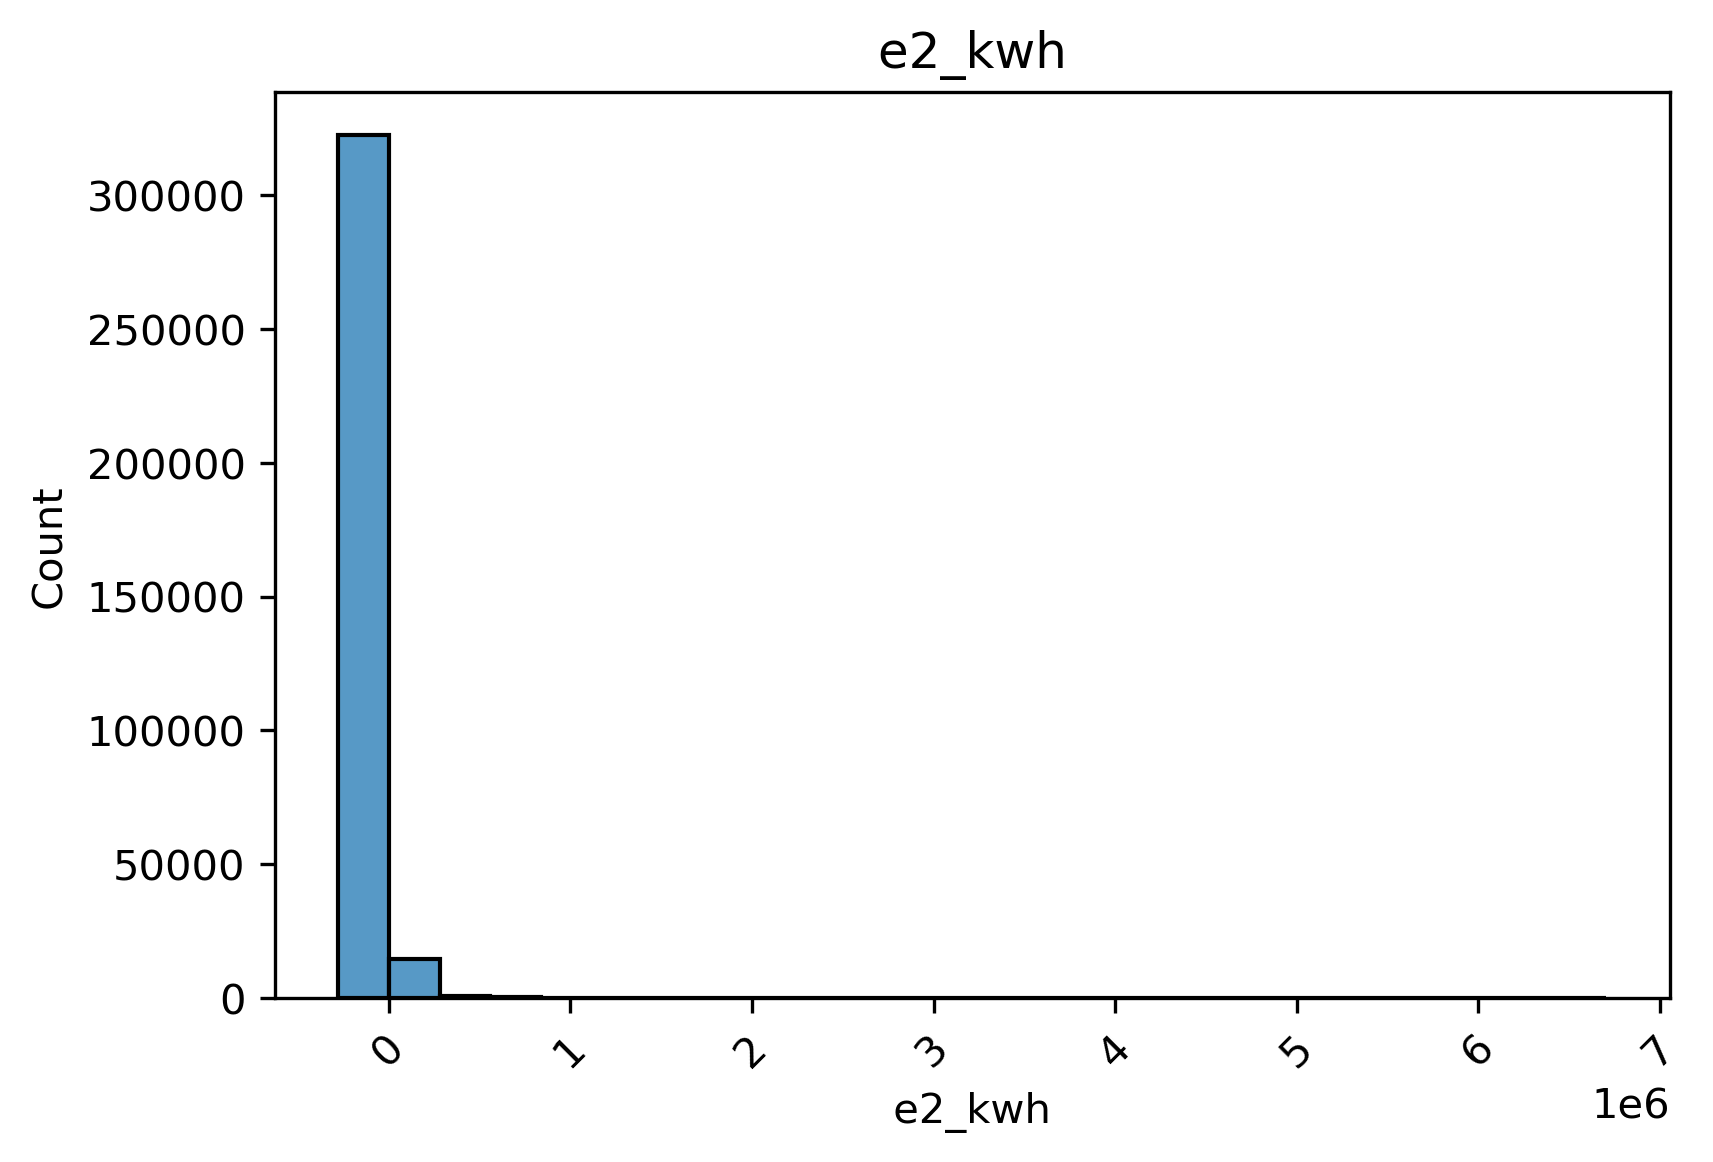

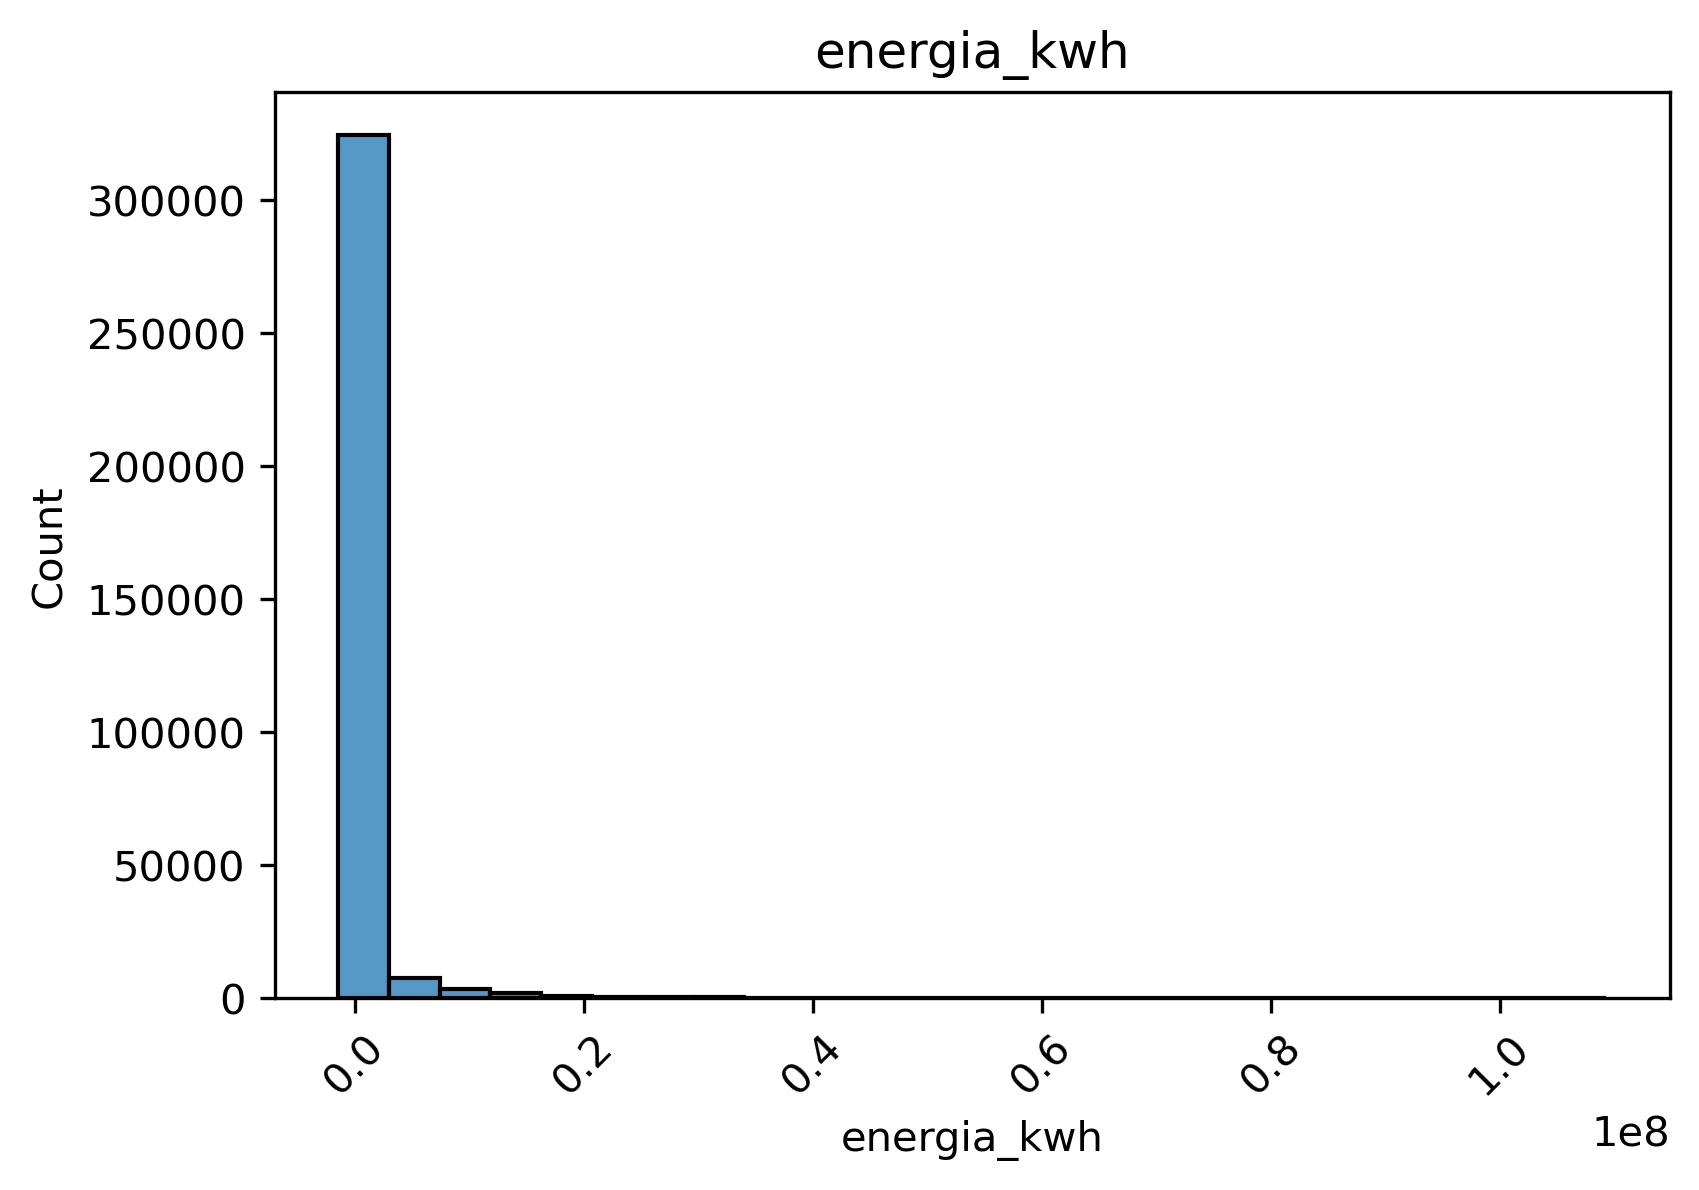

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
0,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PP,179.0,108809.0,0.0,108809.0
1,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT43,128.0,3241469.0,0.0,3241469.0
2,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,AT42,14.0,257092.0,0.0,257092.0
3,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT2PPP,10.0,6555.0,0.0,6555.0
4,2015,1,Región del Libertador Gral Bernardo O’Higgins,Las Cabras,No Residencial,BT42,1.0,588.0,0.0,588.0
...,...,...,...,...,...,...,...,...,...,...
338647,2021,12,Región de Magallanes y de la Antártica Chilena,Porvenir,No Residencial,BT3PP,22.0,61353.0,0.0,61353.0
338648,2021,12,Región de La Araucanía,Pitrufquén,No Residencial,BT3PP,12.0,44729.0,0.0,44729.0
338649,2021,12,Región de Arica y Parinacota,Arica,No Residencial,BT3PP,399.0,1016534.0,0.0,1016534.0
338650,2021,12,Región de Arica y Parinacota,Putre,No Residencial,BT3PP,2.0,9488.0,0.0,9488.0


In [20]:
graf_automaticos(base_zero)
# estandarizar la base

Como primeras impresiones se puede ver que:
- La cantidad de facturación es aumenta desde el 2015 al 2020 y disminuye al 2021
- la cantidad de facturaciones por mes es constante a través de los años
- la región que más registros presenta es la metropolitana, mientras que la que menos es la de Arica y parinacota
- en el top 46 de regiones, temuco es la que presenta mayor cantidad de registros
- existen mayor cantidad de registros de clientes no residenciales que residenciales
- los tipos de tarifas que más se repiten son bt43, at43 y bt2pp
- en e1-kwh los registros se concentran entre los 0 y los 20 millones de kwh
- en e2-kwh existen muchos registros negativos, debe revisarse estos valores
- en energia_kwh los registros se concentran entre los 0 y los 20 millones de kwh

In [21]:
base_zero.groupby(['anio','tipo_clientes'])[['energia_kwh']].sum().reset_index()

,anio,tipo_clientes,energia_kwh
0,2015,No Residencial,1.827282e+10
1,2015,Residencial,1.261939e+10
2,2016,No Residencial,1.853585e+10
3,2016,Residencial,1.287451e+10
4,2017,No Residencial,1.711607e+10
5,2017,Residencial,1.331733e+10
6,2018,No Residencial,1.447989e+10
7,2018,Residencial,1.368509e+10
8,2019,No Residencial,1.184249e+10
9,2019,Residencial,1.392504e+10


In [22]:
anios=base_zero.groupby(['anio','tipo_clientes'])[['energia_kwh']].sum().reset_index()

In [23]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [24]:
anios[anios['tipo_clientes']=='Residencial']

,anio,tipo_clientes,energia_kwh
1,2015,Residencial,1.261939e+10
3,2016,Residencial,1.287451e+10
5,2017,Residencial,1.331733e+10
7,2018,Residencial,1.368509e+10
9,2019,Residencial,1.392504e+10
11,2020,Residencial,1.542610e+10
13,2021,Residencial,1.579776e+10


In [25]:
from bokeh.models import NumeralTickFormatter
p = figure(width=600, height=400,
            x_axis_label='Años',
            y_axis_label='Energía en kwh',
            title='Variación de la energía en kwh a través de los años')

# add a line renderer
residencial=anios[anios['tipo_clientes']=='Residencial']
no_residencial=anios[anios['tipo_clientes']!='Residencial']
p.line(residencial['anio'], residencial['energia_kwh'],legend_label="Residencial", line_width=2)
p.line(no_residencial['anio'], no_residencial['energia_kwh'],legend_label="No residencial",color='red', line_width=2)
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")


show(p)

In [26]:
a=residencial['energia_kwh'].max()
b=residencial['energia_kwh'].min()
(a-b)/b

0.2518637199102477

In [27]:
c=no_residencial[no_residencial['anio']==2015]['energia_kwh']
d=no_residencial[no_residencial['anio']==2021]['energia_kwh']
c,d=float(c),float(d)
(d-c)/c

-0.4643444096660882

Podemos ver que a traves de los años ha existido un cambio de los kwh facturados a los dos tipos de clientes, mientras que los residenciales ha aumentado un 25,18% desde el 2015 al 2021. 
Mientras que el consumo no residencial disminuyo su facturación en un 46,43% dentro del mismo periodo.

Realizando un scatter plot entre la cantidad de clientes facturados y energia facturada

In [28]:
base_zero.rename(columns={' clientes_facturados ':'clientes_facturados'},inplace=True)

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clientes_facturados', ylabel='energia_kwh'>

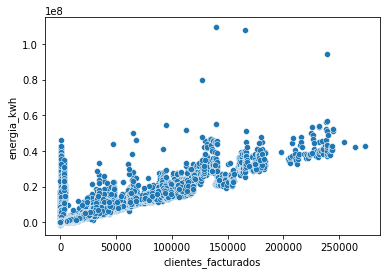

In [29]:
sns.scatterplot(base_zero['clientes_facturados'],base_zero['energia_kwh'])


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


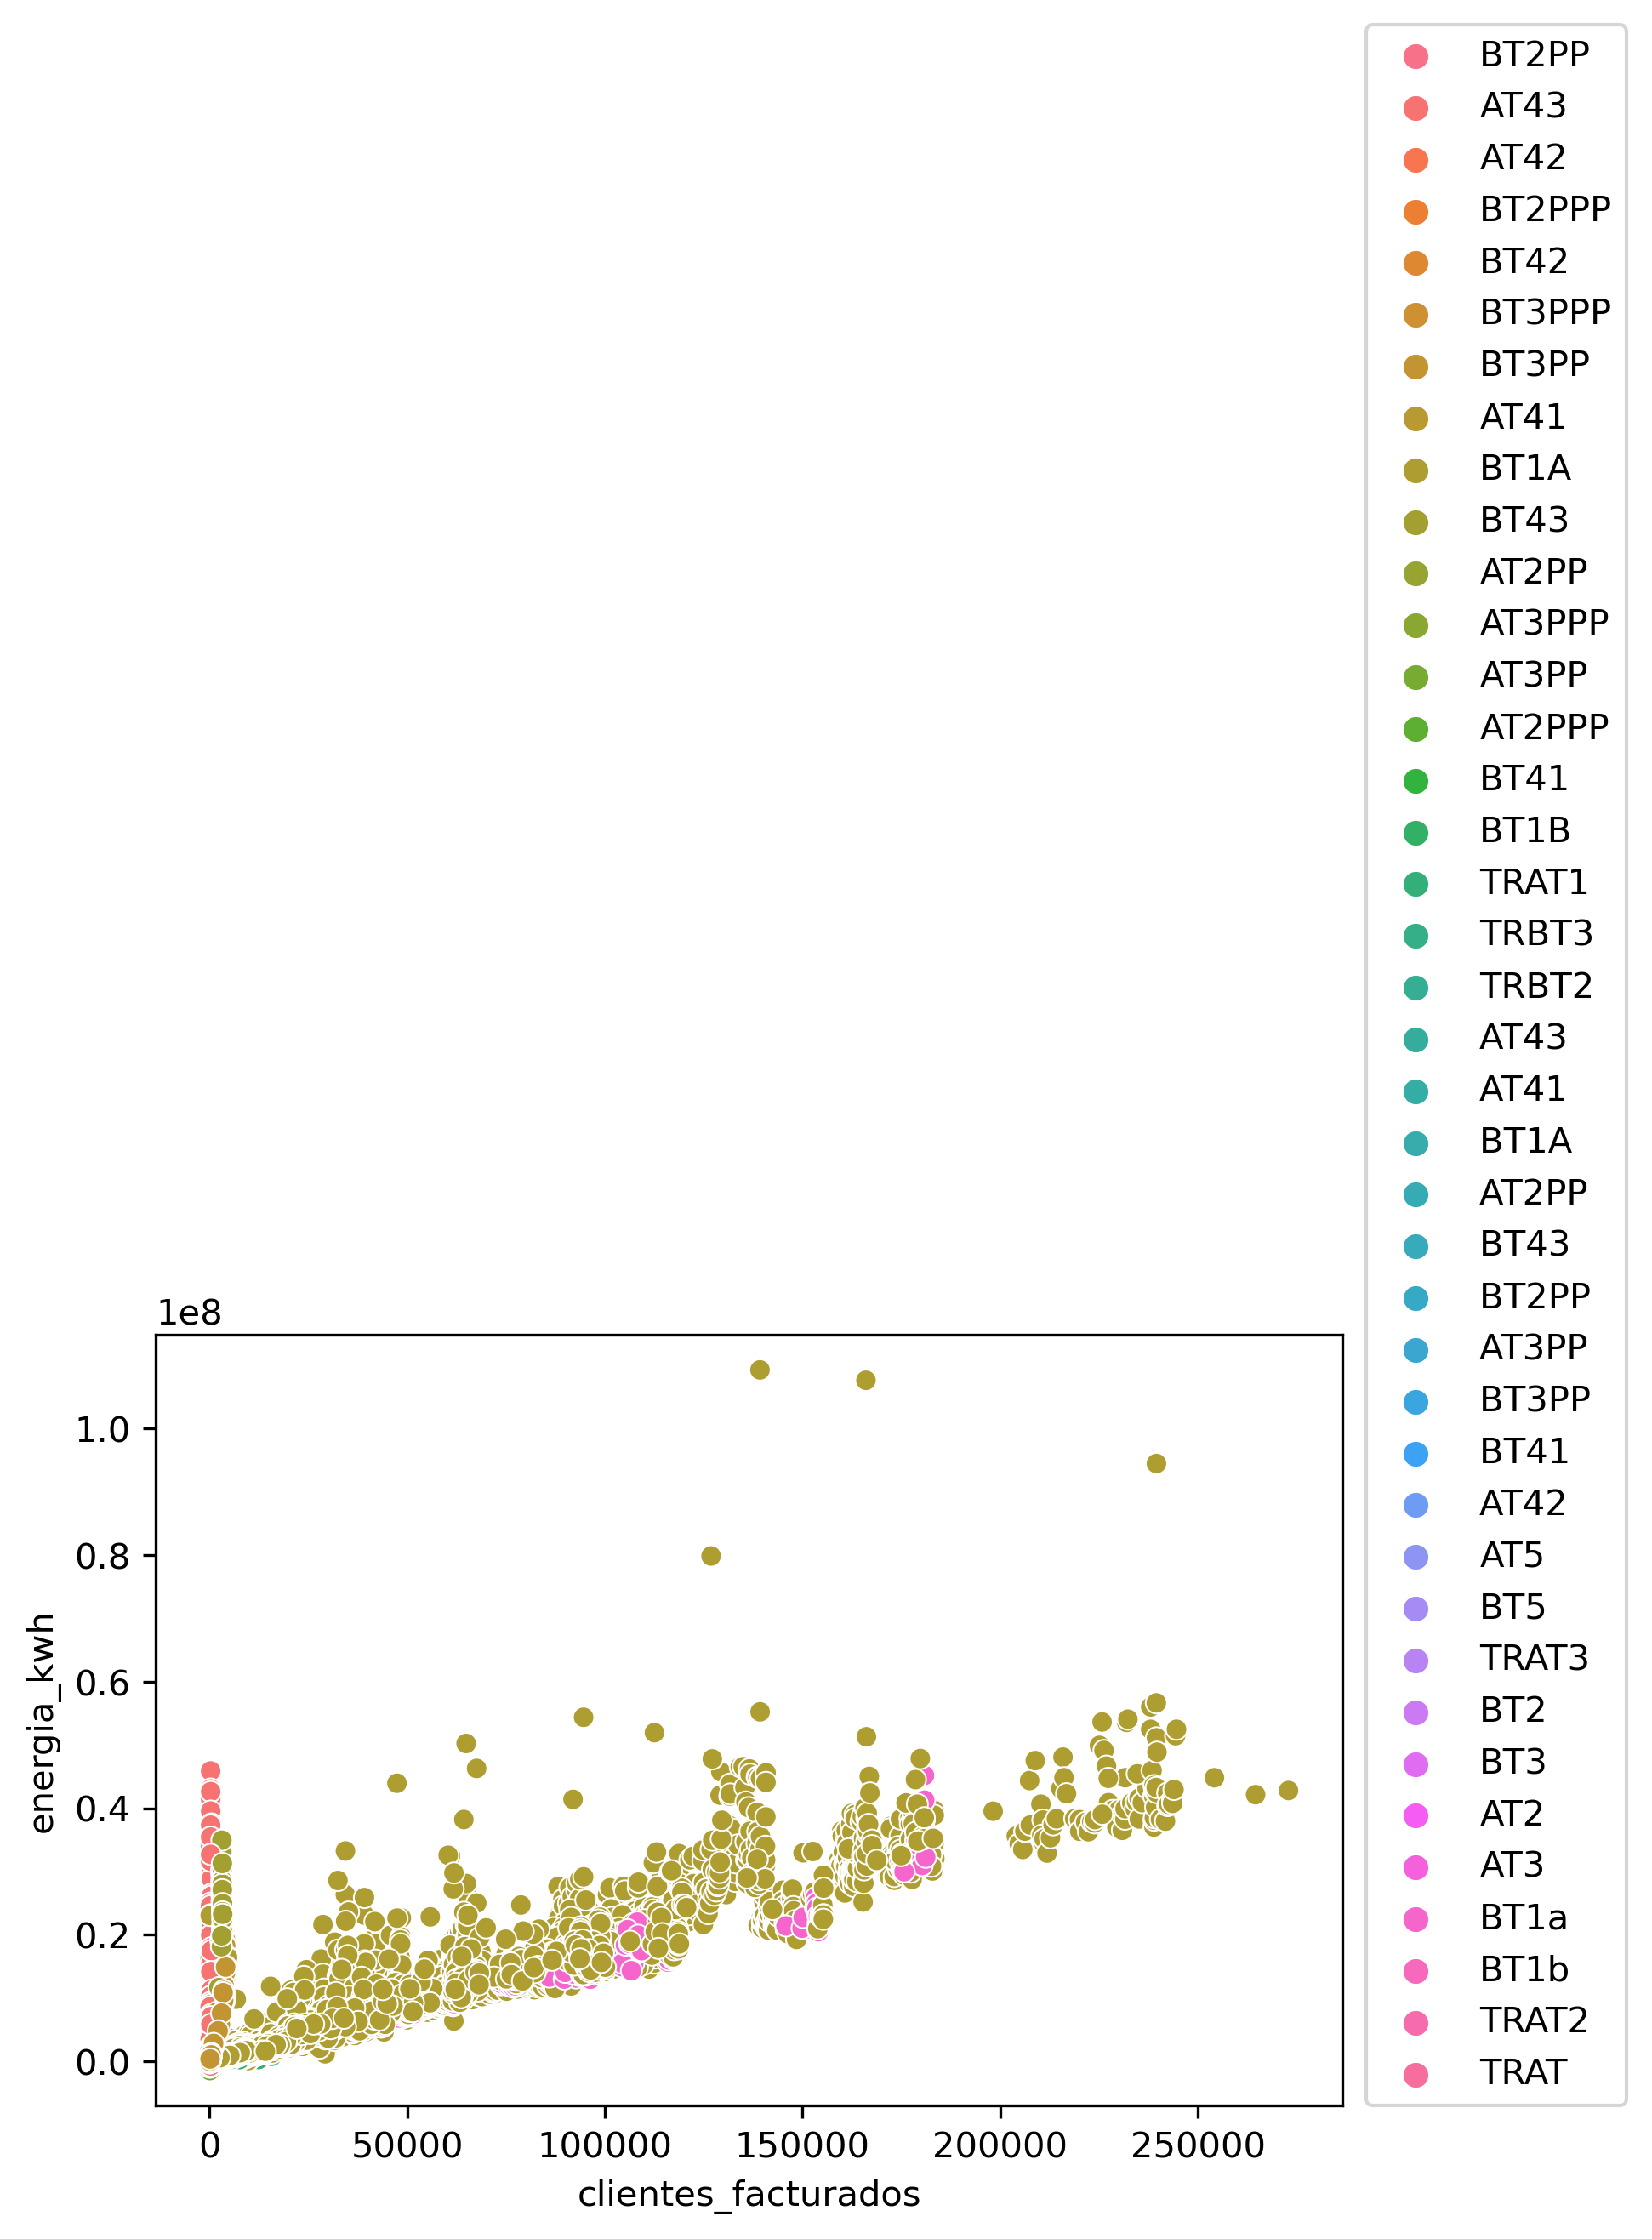

In [30]:
plt.figure(dpi=300)
sns.scatterplot(base_zero['clientes_facturados'],base_zero['energia_kwh'],hue=base_zero['tarifa'])
plt.legend(loc=[1.02,0])


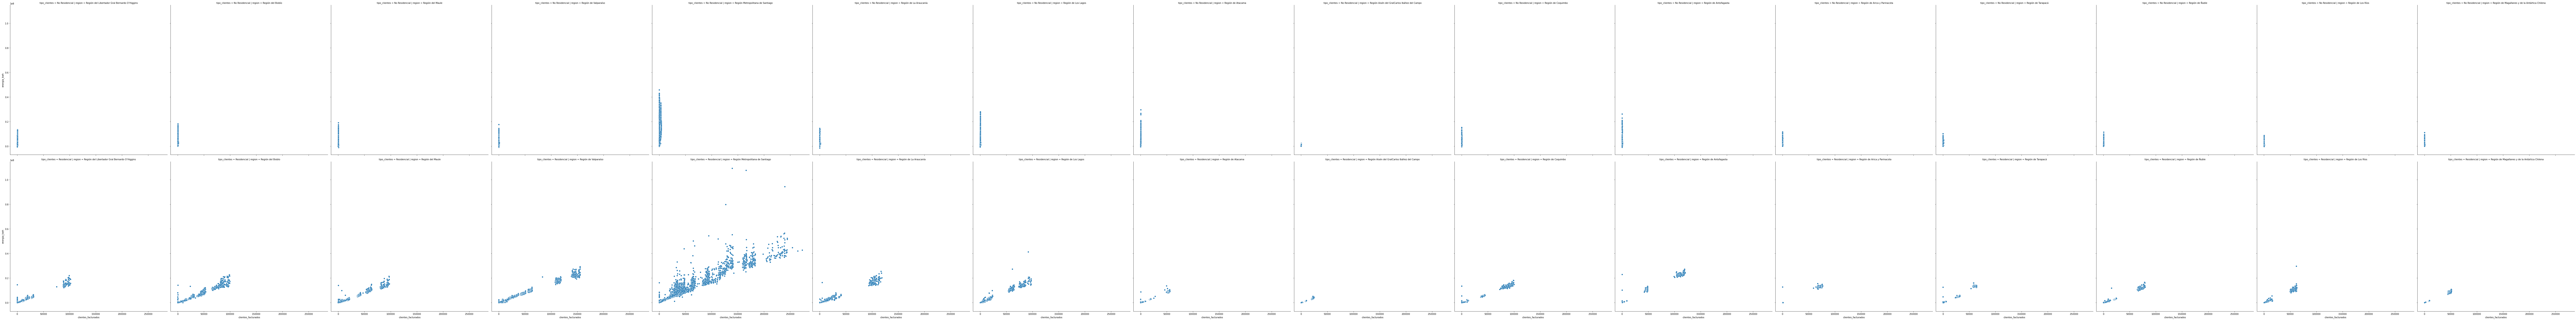

In [31]:
g = sns.FacetGrid(base_zero, col="region", row='tipo_clientes', height=10) 
g.map(sns.scatterplot, "clientes_facturados", "energia_kwh", palette='pastel')
g.tight_layout()



Se puede apreciar que existen agrupaciones de datos a lo largo de todas las regiones y que por sobretodo mantienen un patron al diferenciarse entre clientes residenciales y no residenciales. Por lo que podría ser esperable que al generar los cluster, estos patrones se vean reflejados en la data

## Modelos de clustering


### KMEANS

In [32]:
from sklearn.cluster import KMeans

In [33]:
base_zero.columns

Index(['anio', 'mes', 'region', 'comuna', 'tipo_clientes', 'tarifa',
       'clientes_facturados', ' e1_kwh ', ' e2_kwh ', 'energia_kwh'],
      dtype='object')

In [34]:
X = base_zero.drop(columns=['anio','mes','region','comuna','tipo_clientes','tarifa',' e1_kwh ',' e2_kwh '])

In [35]:
X.values

array([[1.790000e+02, 1.088090e+05],
       [1.280000e+02, 3.241469e+06],
       [1.400000e+01, 2.570920e+05],
       ...,
       [3.990000e+02, 1.016534e+06],
       [2.000000e+00, 9.488000e+03],
       [1.090000e+02, 3.749380e+05]])

(1.0, 20.0)

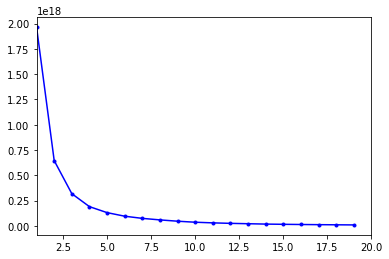

In [36]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')
plt.xlim(1,20)

In [37]:
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred



array([0, 4, 0, ..., 7, 0, 0], dtype=int32)

Text(0.5, 0, 'clientes_facturados')

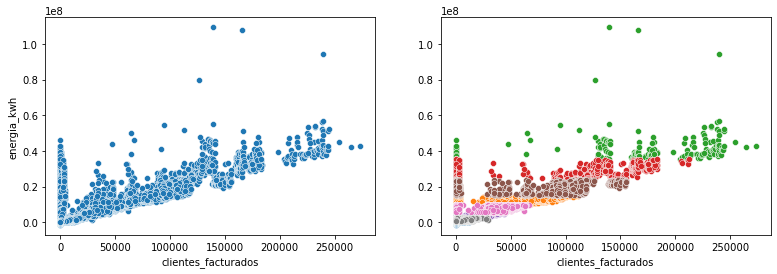

In [38]:
base=X.values
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=X,y='energia_kwh',x='clientes_facturados')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=base[y_pred==i,0],y=base[y_pred==i,1])
ax2.set_xlabel('clientes_facturados')

In [39]:
base2=X.copy()
base2['Predicción']=y_pred
base2

,clientes_facturados,energia_kwh,Predicción
0,179.0,108809.0,0
1,128.0,3241469.0,4
2,14.0,257092.0,0
3,10.0,6555.0,0
4,1.0,588.0,0
...,...,...,...
338647,22.0,61353.0,0
338648,12.0,44729.0,0
338649,399.0,1016534.0,7
338650,2.0,9488.0,0


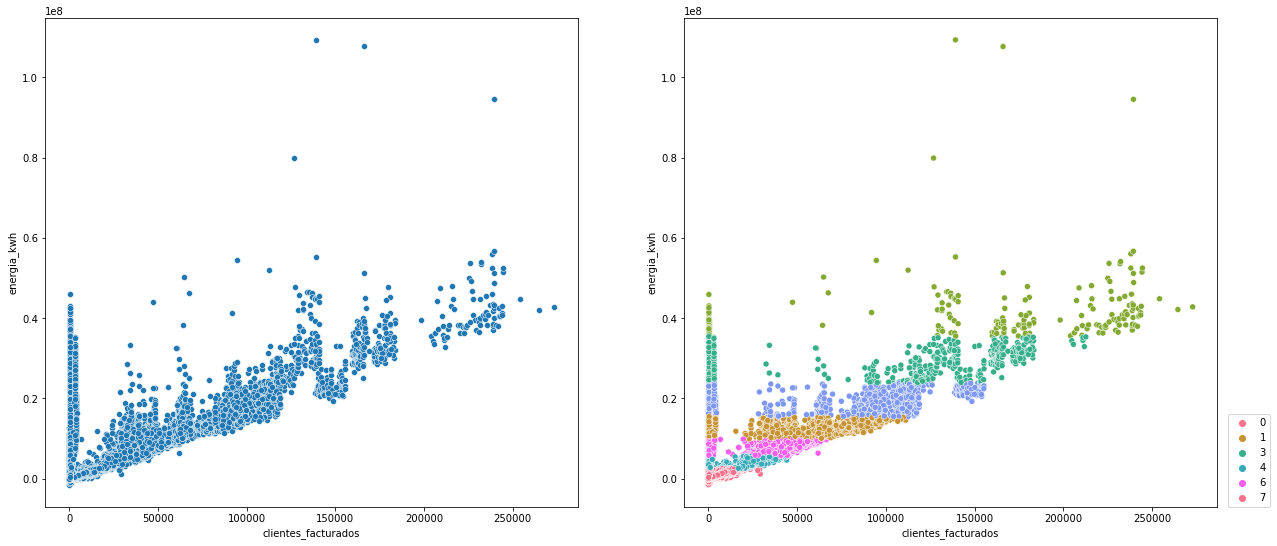

In [40]:
fig = plt.figure(figsize=(21,9))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=base2,y='energia_kwh',x='clientes_facturados')
ax2=fig.add_subplot(1,2,2)
ax2=sns.scatterplot(data=base2,x='clientes_facturados',y='energia_kwh',hue='Predicción',palette='husl')
ax2.set_xlabel('clientes_facturados')
ax2.legend(loc=[1.02,0])

In [41]:
base2['Predicción'].value_counts()

0    293645
7     29116
4      7188
6      4184
1      2600
5      1183
3       521
2       214
Name: Predicción, dtype: int64

Ahora calculando la Silhouette Score, que indica el nivel de "buen clusterización" de la data.
La teoria dice que este valor fluctua entre -1 a 1, donde 
1 -> Los grupos estan claramente identificados
0 -> La distancia entre los grupos no es significativa
-1 -> Los clusteres se asigan de forma incorrecta 

In [42]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(base, kmeans.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

Este valor nos indica que los clusteres estan bastante bien en general, pero que no es perfecto. Por lo que podriamos decir que los clusteres fueron asignados casi de manera correcta excepto para algunos casos. 

Silhouetter score: 0.844

Ahora revisando otros algoritmos

### DBscan

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan = DBSCAN(eps=0.8, min_samples=100)
y_pred = dbscan.fit_predict(X)
print(y_pred)

[-1 -1 -1 ... -1 -1 -1]


In [45]:
db=dbscan.fit(X)
labels=db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 328926


In [46]:
base3=X.copy()
base3['prediccion']=y_pred
base3

,clientes_facturados,energia_kwh,prediccion
0,179.0,108809.0,-1
1,128.0,3241469.0,-1
2,14.0,257092.0,-1
3,10.0,6555.0,-1
4,1.0,588.0,-1
...,...,...,...
338647,22.0,61353.0,-1
338648,12.0,44729.0,-1
338649,399.0,1016534.0,-1
338650,2.0,9488.0,-1


In [47]:
base3.prediccion.value_counts()

-1    328926
 1      4478
 0      4430
 2       562
 3       155
 4       100
Name: prediccion, dtype: int64

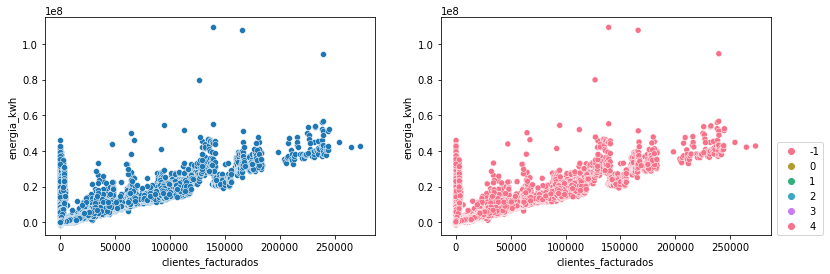

In [48]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=base3,y='energia_kwh',x='clientes_facturados')
ax2=fig.add_subplot(1,2,2)
ax2=sns.scatterplot(data=base3,x='clientes_facturados',y='energia_kwh',hue='prediccion',palette='husl')
ax2.set_xlabel('clientes_facturados')
ax2.legend(loc=[1.02,0])

<AxesSubplot:xlabel='clientes_facturados', ylabel='energia_kwh'>

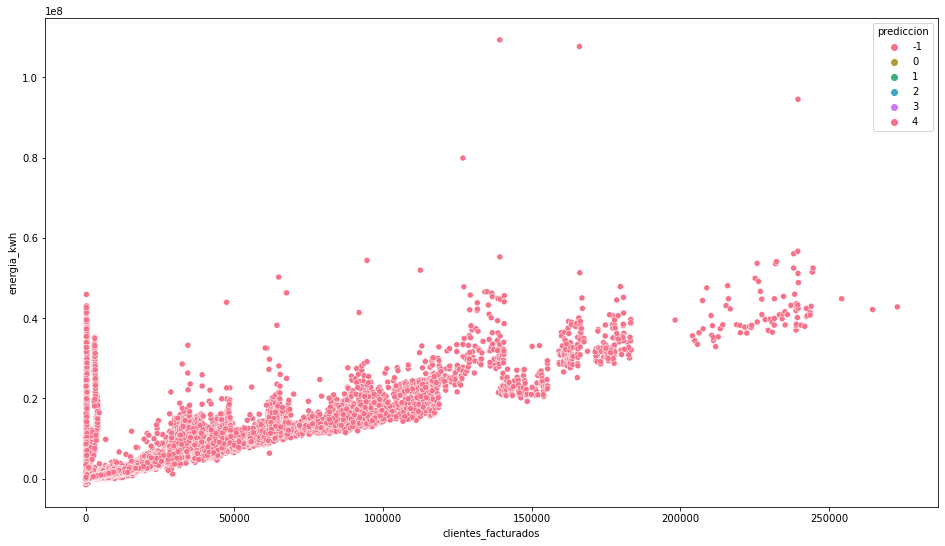

In [49]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=base3,x='clientes_facturados',y='energia_kwh',hue='prediccion',palette='husl')

In [50]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# score = silhouette_score(X, labels, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

El valor de la silueta es muy bajo (-0.72) y no puede diferenciar entre un cluster y otro, por ende no es recomendable usar este algortimo

### Agglomerative 

In [51]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=8)

El kernel se cae al hacer el fit

### mean-shift

In [52]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

In [53]:
# bandwidth = estimate_bandwidth(X, quantile=0.2)

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters_)

Entrega 51 posibles clusters con toda la data, se demoró 80 minutos